In [41]:
import numpy as np
import pandas as pd
import nltk
import re


In [73]:
df=pd.read_csv("C:\\Users\\varad\Desktop\\Projects\\Twitter_Data.csv")

In [76]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [78]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
clean_text    4
category      7
dtype: int64


In [79]:
df = df.dropna(axis=0)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [81]:
print(df.isnull().sum())

clean_text    0
category      0
dtype: int64


In [82]:
def remove_noise(text,noise):
    r=re.findall(noise,text)
    for i in r:
        text=re.sub(i,"",text)
        
    return text

In [83]:
df['clean_text']=np.vectorize(remove_noise)(df['clean_text'],"@[\w]*")
df['clean_text']=df['clean_text'].apply(lambda x:re.sub(r"http\S+\www\S+|https\S+", "",x,flags=re.MULTILINE))

In [84]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [85]:
df['clean_text']=df["clean_text"].str.replace("[^a-zA-z#]"," ")

C:\Users\varad\AppData\Local\Temp\ipykernel_10404\890053709.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text']=df["clean_text"].str.replace("[^a-zA-z#]"," ")


In [89]:
df.head()

,clean_text,category
0,when modi promised minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [90]:
# df['clean_text']=df['clean_text'].apply(lambda x:re.sub(r"http\S+\www\S+|https\S+", "",x,flags=re.MULTILINE))
df['clean_text']=df['clean_text'].apply(lambda x: x.lower())

        

In [94]:
# for text in df['clean_text']:
#     str(text).split()

df['clean_text']=df['clean_text'].apply(lambda x: x.split())



In [95]:
df.head()

,clean_text,category
0,"[when, modi, promised, minimum, government, ma...",-1.0
1,"[talk, all, the, nonsense, and, continue, all,...",0.0
2,"[what, did, just, say, vote, for, modi, welcom...",1.0
3,"[asking, his, supporters, prefix, chowkidar, t...",1.0
4,"[answer, who, among, these, the, most, powerfu...",1.0


In [96]:
stop_words=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]


In [102]:
for text in df['clean_text']:
    for word in text:
        if (word in stop_words):
            text.remove(word)


In [103]:
df.head()

,clean_text,category
0,"[modi, promised, minimum, government, maximum,...",-1.0
1,"[talk, nonsense, continue, drama, vote, modi]",0.0
2,"[say, vote, modi, welcome, bjp, told, rahul, m...",1.0
3,"[asking, supporters, prefix, chowkidar, names,...",1.0
4,"[answer, among, powerful, world, leader, today...",1.0


In [104]:
# from nltk.stem.porter import PorterStemmer
# from nltk import SnowballStemmer
# snow_ball_stemmer=SnowballStemmer('english')

In [112]:
# # stemmed_words=df['Clean_text']
# i=0
# while i <len(df['clean_text']):
#     s=""
#     for word  in df['Clean_text'][i]:
#         str=snow_ball_stemmer.stem(word)
#         s+=str+" "
#     df['Clean_text'][i]=s
#     i+=1

# !pip3 install -U textblob
# from textblob import Word, TextBlob
    
 


Defaulting to user installation because normal site-packages is not writeable


In [120]:
# for words in df['clean_text']:
#     for w in words:
#         w=Word(w)
#         w.lemmatize()
        
# JOIN

df['clean_text']=df['clean_text'].str.join(" ")

In [121]:
df.head()

,clean_text,category
0,modi promised minimum government maximum gover...,-1.0
1,talk nonsense continue drama vote modi,0.0
2,say vote modi welcome bjp told rahul main camp...,1.0
3,asking supporters prefix chowkidar names modi ...,1.0
4,answer among powerful world leader today trump...,1.0


In [122]:
from textblob import TextBlob

In [123]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

In [124]:
df['Subjectivity']=df['clean_text'].apply(getsubjectivity)
df['Polarity']=df['clean_text'].apply(getpolarity)

In [125]:
df.head()

,clean_text,category,Subjectivity,Polarity
0,modi promised minimum government maximum gover...,-1.0,0.700000,-0.300000
1,talk nonsense continue drama vote modi,0.0,0.000000,0.000000
2,say vote modi welcome bjp told rahul main camp...,1.0,0.616667,0.483333
3,asking supporters prefix chowkidar names modi ...,1.0,0.711111,0.033333
4,answer among powerful world leader today trump...,1.0,1.000000,0.300000


In [126]:
def getAnalysis (p):
    if(p<0):
        return 'Negative'
    elif (p>0):
        return 'Positive'
    else:
        return 'Neutral'
df["Analysis"]=df['Polarity'].apply(getAnalysis)

In [127]:
df['Analysis'].value_counts()

Positive    68861
Neutral     59988
Negative    34120
Name: Analysis, dtype: int64

In [128]:
df.head()

,clean_text,category,Subjectivity,Polarity,Analysis
0,modi promised minimum government maximum gover...,-1.0,0.700000,-0.300000,Negative
1,talk nonsense continue drama vote modi,0.0,0.000000,0.000000,Neutral
2,say vote modi welcome bjp told rahul main camp...,1.0,0.616667,0.483333,Positive
3,asking supporters prefix chowkidar names modi ...,1.0,0.711111,0.033333,Positive
4,answer among powerful world leader today trump...,1.0,1.000000,0.300000,Positive


In [129]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Defaulting to user installation because normal site-packages is not writeable


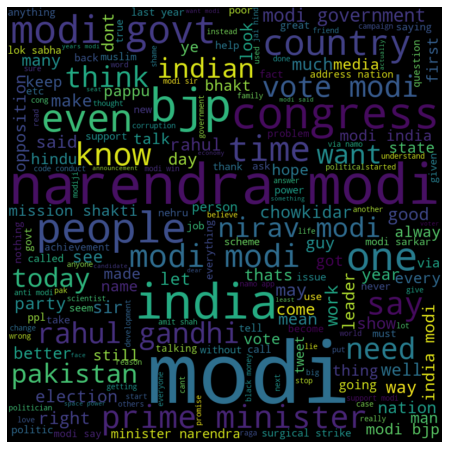

In [133]:
allTweets=' '.join([twts for twts in df['clean_text']])
wordCloud = WordCloud(width = 800, height = 800,
                background_color ='black',
               
                min_font_size = 10).generate(allTweets)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis("off")
# plt.tight_layout(pad = 0)
 
plt.show()

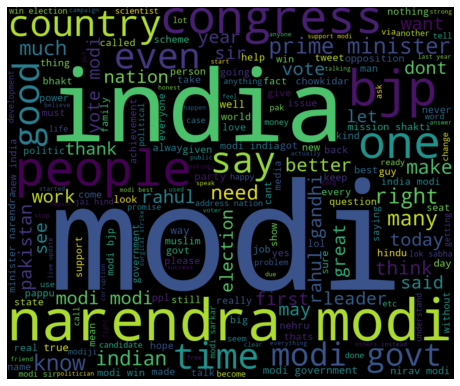

In [136]:
positive=' '.join([twts for twts in df[df['Polarity']>0]['clean_text']])
wordCloud = WordCloud(width = 1200, height = 1000,
                background_color ='black',
               
                min_font_size = 10).generate(positive)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis("off")
# plt.tight_layout(pad = 0)
 
plt.show()

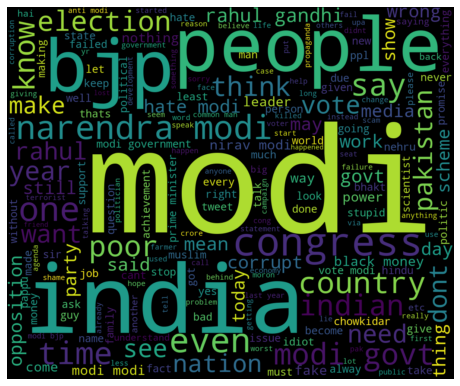

In [135]:
negative=' '.join([twts for twts in df[df['Polarity']<0]['clean_text']])
wordCloud = WordCloud(width = 1200, height = 1000,
                background_color ='black',
               
                min_font_size = 10).generate(negative)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis("off")
# plt.tight_layout(pad = 0)
 
plt.show()

In [162]:
# y=df['category']
# X=df['clean_text']
 
# # split the dataset


In [194]:
# print('X_train : ')
# print(X_train.head())
# print('')
# print('X_test : ')
# print(X_test.head())
# print('')
# print('y_train : ')
# print(y_train.head())
# print('')
# print('y_test : ')
# print(y_test.head())

In [142]:
df.head()

,clean_text,category,Subjectivity,Polarity,Analysis
0,modi promised minimum government maximum gover...,-1.0,0.700000,-0.300000,Negative
1,talk nonsense continue drama vote modi,0.0,0.000000,0.000000,Neutral
2,say vote modi welcome bjp told rahul main camp...,1.0,0.616667,0.483333,Positive
3,asking supporters prefix chowkidar names modi ...,1.0,0.711111,0.033333,Positive
4,answer among powerful world leader today trump...,1.0,1.000000,0.300000,Positive


In [197]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [198]:
bob_vectorizer=CountVectorizer()
tfvector=TfidfVectorizer()

In [199]:
bob=bob_vectorizer.fit_transform(df['clean_text'])
tf=tfvector.fit_transform(df['clean_text'])

In [184]:
bob

<162969x100604 sparse matrix of type '<class 'numpy.int64'>'
	with 2186060 stored elements in Compressed Sparse Row format>

In [181]:
print(bob)

  (0, 57185)	1
  (0, 71433)	1
  (0, 56353)	1
  (0, 35482)	1
  (0, 55079)	1
  (0, 35454)	1
  (0, 29759)	1
  (0, 8943)	1
  (0, 24459)	1
  (0, 46143)	1
  (0, 74900)	1
  (0, 85318)	2
  (0, 88019)	1
  (0, 99522)	1
  (0, 34368)	1
  (0, 46759)	1
  (0, 13127)	1
  (0, 29696)	1
  (0, 72031)	1
  (0, 88950)	1
  (1, 57185)	1
  (1, 88116)	1
  (1, 62475)	1
  (1, 19283)	1
  (1, 26156)	1
  :	:
  (162967, 10492)	1
  (162967, 13517)	1
  (162967, 26281)	1
  (162967, 71372)	2
  (162967, 74367)	1
  (162968, 57185)	1
  (162968, 88019)	1
  (162968, 60535)	1
  (162968, 51403)	1
  (162968, 1204)	1
  (162968, 69333)	1
  (162968, 42064)	1
  (162968, 77267)	2
  (162968, 29170)	1
  (162968, 29193)	1
  (162968, 83908)	1
  (162968, 71829)	1
  (162968, 6153)	2
  (162968, 39118)	1
  (162968, 21020)	1
  (162968, 51612)	1
  (162968, 53489)	1
  (162968, 24879)	1
  (162968, 53488)	1
  (162968, 36617)	1


In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( bob, df['category'], test_size=0.25, random_state=0)

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [187]:
model=LogisticRegression()
model.fit(X_train,y_train)


D:\Anaconda_python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [188]:
pred=model.predict(X_test)

In [190]:
f1_score(y_test,pred,average='micro')

0.9059470338463049

In [193]:
accuracy_score(y_test,pred)

0.9059470338463049

In [200]:
### TF_IDF
tf

<162969x100604 sparse matrix of type '<class 'numpy.float64'>'
	with 2186060 stored elements in Compressed Sparse Row format>

In [216]:
X_train, X_test, y_train, y_test = train_test_split( tf, df['category'], test_size=0.25, random_state=0)

In [217]:
model.fit(X_train,y_train)

D:\Anaconda_python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [203]:
pred=model.predict(X_test)

In [205]:
f1_score(y_test,pred,average='micro')

0.8840291583830351

In [207]:
accuracy_score(pred,y_test)

0.8840291583830351